## Import and subset Gender-Science IAT data

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import glob

In [8]:
genderiat = pd.read_csv('../data/gendersciiatdat.csv')


## Descriptives

In [9]:
# means of variables grouped by participant race, sorted by IAT scores
genderiat.groupby('raceomb').mean().sort_values(by = 'implicit')

,implicit,explicit,politics,year,age,education
raceomb,,,,,,
7.0,0.269313,4.784722,4.724638,2011.861111,24.028571,5.366197
3.0,0.269464,4.832075,4.910506,2012.098113,23.030189,6.027027
9.0,0.291069,4.804140,4.546926,2011.490446,25.366559,5.695793
2.0,0.293708,4.937690,4.672956,2011.553191,23.767584,6.287926
1.0,0.298682,4.916667,4.310345,2010.983333,26.559322,5.741379
5.0,0.303059,4.971850,4.699164,2011.359249,28.621918,5.808219
8.0,0.305332,4.680000,4.813609,2011.388571,24.962536,5.653295
6.0,0.357507,4.802758,4.707095,2011.616478,27.978797,6.293658
4.0,0.389733,4.911765,4.121212,2011.382353,24.606061,5.727273


In [10]:
# means of variables grouped by participant gender, sorted by IAT scores
genderiat.groupby('sex').mean().sort_values(by = 'implicit')

,implicit,explicit,raceomb,politics,year,age,education
sex,,,,,,,
f,0.322375,4.802376,5.856458,4.745578,2011.563832,26.971526,6.108015
.,0.327727,4.712375,6.035714,4.816667,2011.709030,26.166667,6.017241
m,0.388038,4.830692,5.834392,4.612958,2011.664304,28.077085,6.373033


In [11]:
pd.crosstab(genderiat['sex'], genderiat['raceomb'])

raceomb,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
sex,,,,,,,,,
.,0,1,2,0,3,44,0,3,3
f,42,205,176,24,274,4002,47,260,188
m,18,123,87,10,96,1792,25,87,123


In [11]:
# mean, min, max of implicit and explicit
print(genderiat.agg({'implicit':['min','mean','max']}))
print(genderiat.agg({'explicit':['min','mean','max']}))

      implicit
min  -1.788986
mean  0.342257
max   1.518473
      explicit
min     1.0000
mean    4.8075
max     7.0000


# matplotlib and seaborn

### Scatter IAT scores by age

Text(0.5,0,'Participant age')

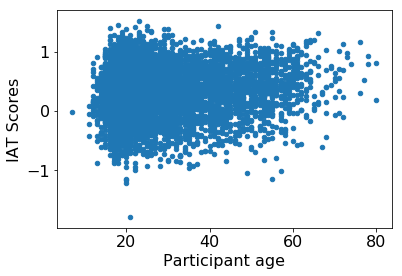

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

# Scatter iat 
plt.rcParams.update({'font.size': 16}) # make default font size 16
genderiat.plot(kind='scatter', x='age', y='implicit') 
plt.ylabel('IAT Scores')
plt.xlabel('Participant age')

### Plot average IAT score by year

In [77]:
print(genderiat.groupby('year')['implicit'].mean()) # get average iat score each year
    # saved as Series of iat scores; does not save year as a column

year
2007    0.401078
2008    0.359111
2009    0.362537
2010    0.367500
2011    0.343603
2012    0.360266
2013    0.325889
2014    0.314612
2015    0.306241
Name: implicit, dtype: float64


Text(0,0.5,'Association of male with science')

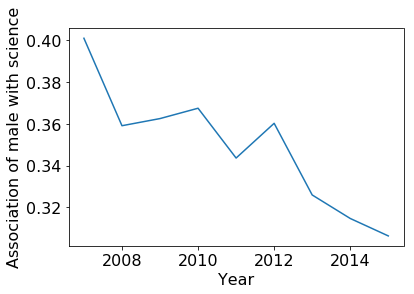

In [78]:
# plot yearwise iat scores averages by year
plt.plot([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], genderiat.groupby('year')['implicit'].mean())
plt.xlabel('Year')
plt.ylabel('Association of male with science')

### Histogram of IAT scores

(array([1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 2.200e+01,
        6.000e+01, 1.280e+02, 3.050e+02, 4.270e+02, 7.110e+02, 9.670e+02,
        1.145e+03, 1.289e+03, 1.084e+03, 8.480e+02, 4.780e+02, 1.730e+02,
        4.500e+01, 1.100e+01]),
 array([-1.78898611, -1.62361315, -1.45824019, -1.29286724, -1.12749428,
        -0.96212132, -0.79674836, -0.6313754 , -0.46600244, -0.30062948,
        -0.13525652,  0.03011644,  0.1954894 ,  0.36086235,  0.52623531,
         0.69160827,  0.85698123,  1.02235419,  1.18772715,  1.35310011,
         1.51847307]),
 <a list of 20 Patch objects>)

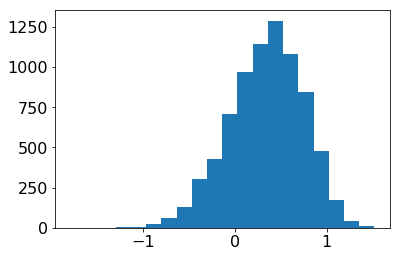

In [94]:
plt.hist(genderiat['implicit'], bins = 20) 

### Regression plot

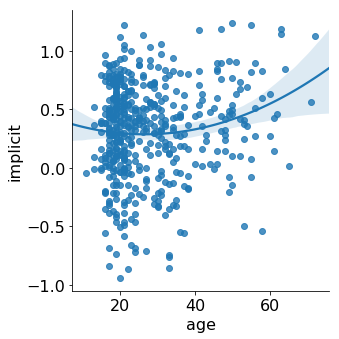

In [108]:
sns.lmplot(x='age', y='implicit', order=2, data=genderiat[0:500]) # order = 2 allows quadratic
# Use only first 500 row of data to get some uncertainty or display will show no variance

### Barplot IAT scores by participant gender

In [5]:
# looks like some gender responses are "."; consider to be missing and remove
genderiat['sex'].value_counts()
genderiat.drop(genderiat[genderiat.sex == "."].index, inplace=True)

In [81]:
# get mean IAT scores by gender
print(genderiat.groupby('sex')['implicit'].mean())

sex
f    0.322375
m    0.388038
Name: implicit, dtype: float64


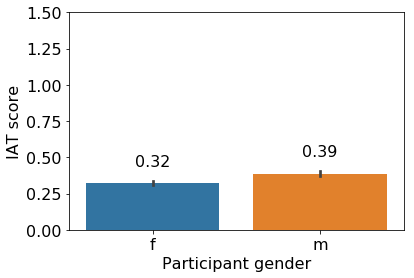

In [90]:
# barplot of iat scores by gender using seaborn
import seaborn as sns
sns.barplot(x='sex', y='implicit', data=genderiat)
plt.ylim(0, 1.5)
plt.xlabel('Participant gender', fontsize=16)
plt.ylabel('IAT score', fontsize=16)

# Make some labels.
barlabels = genderiat.groupby('sex')['implicit'].mean() # make list of values with which to label bars
values = round(barlabels, 2) # round the values

labels = [str(i) for i in values]

for x, y, label in zip(range(len(values)), values, labels):
    plt.text(x, y + .1, label, ha='center', va='bottom')

In [62]:
genderiat['participant_number'] = range(1, len(genderiat) + 1)
genderiat.head()

,implicit,explicit,raceomb,sex,politics,year,age,education,new_col,participant_number
0,1.013018,4.5,6.0,f,3.0,2012,21.0,6.0,1,1
1,0.438193,5.0,6.0,f,4.0,2010,17.0,3.0,2,2
2,0.715223,5.0,NaN,m,NaN,2009,28.0,NaN,3,3
3,-0.015030,4.0,6.0,f,4.0,2013,25.0,7.0,4,4
4,0.560251,3.5,NaN,f,4.0,2014,19.0,7.0,5,5


# scipy

### T test comparing IAT scores of females to males

In [6]:
import scipy
females = genderiat[genderiat['sex'] == 'f'].groupby('participant_number').mean()
males = genderiat[genderiat['sex'] == 'm'].groupby('participant_number').mean()
t,p = scipy.stats.ttest_ind(females['implicit'], males['implicit'])
print(t, p)

KeyError: 'participant_number'

### Correlation of explicit and implicit

In [87]:
r,p = scipy.stats.pearsonr(genderiat['explicit'], genderiat['implicit'])
print(round(r, 2), round(int(p)))


0.22 0


# statsmodels

### between-subject ANOVA

In [33]:
btw_aov_result = smf.ols('implicit ~ raceomb * sex', genderiat).fit()
btw_aov_table = sm.stats.anova_lm(btw_aov_result, typ=2)
print(btw_aov_table)



                  sum_sq      df          F        PR(>F)
sex             7.024142     1.0  43.890983  3.709442e-11
raceomb         0.405978     1.0   2.536793  1.112622e-01
raceomb:sex     0.490308     1.0   3.063732  8.009807e-02
Residual     1212.273587  7575.0        NaN           NaN
